Project Workflow:
1) data collection
2) data cleaning 
3) EDA
4) splitting the data
5) Building the model 
6) trainig the model 
7) Evaluation metrics 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE #coz the data is imbalanced(target)
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


In [4]:
df = pd.read_csv(r"C:\Users\tahur\Desktop\Work\Projects\churn prediction\telecom_customer_churn.csv")

In [5]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [6]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [8]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [9]:
df = df.drop(columns='Customer ID')

In [10]:
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [11]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

In [12]:
df.drop(['Latitude', 'Longitude', 'Zip Code','Churn Category','Churn Reason'],axis=1,inplace=True)

In [13]:
pd.set_option("display.max_columns",None)

In [14]:
df.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [15]:
df.shape

(7043, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  6361 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [17]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [18]:
tutorial_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

In [19]:
my_col = ['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']

In [20]:
set1 = set(my_col)
set2 = set(tutorial_col)

In [21]:
extra_cols = set2-set1
extra_cols

{'Churn',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MonthlyCharges',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'gender',
 'tenure'}

In [22]:
columns_to_drop = [
    'City', 'Number of Referrals', 'Offer', 'Avg Monthly Long Distance Charges', 
    'Internet Type', 'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue'
]

df = df.drop(columns=columns_to_drop)


In [23]:
df = df.rename(columns={

    'Gender': 'gender',
    'Married': 'Partner',
    'Number of Dependents': 'Dependents',
    'Tenure in Months': 'tenure',
    'Phone Service': 'PhoneService',
    'Multiple Lines': 'MultipleLines',
    'Internet Service': 'InternetService',
    'Online Security': 'OnlineSecurity',
    'Online Backup': 'OnlineBackup',
    'Device Protection Plan': 'DeviceProtection',
    'Premium Tech Support': 'TechSupport',
    'Streaming TV': 'StreamingTV',
    'Streaming Movies': 'StreamingMovies',
    'Contract': 'Contract',
    'Paperless Billing': 'PaperlessBilling',
    'Payment Method': 'PaymentMethod',
    'Monthly Charge': 'MonthlyCharges',
    'Total Charges': 'TotalCharges',
    'Customer Status': 'Churn'
})


In [24]:
df

,gender,Age,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,37,Yes,0,9,Yes,No,Yes,No,Yes,No,Yes,Yes,No,One Year,Yes,Credit Card,65.60,593.30,Stayed
1,Male,46,No,0,9,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,-4.00,542.40,Stayed
2,Male,50,No,0,4,Yes,No,Yes,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,Churned
3,Male,78,Yes,0,13,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,Churned
4,Female,75,Yes,0,3,Yes,No,Yes,No,No,No,Yes,Yes,No,Month-to-Month,Yes,Credit Card,83.90,267.40,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,13,Yes,No,Yes,Yes,No,No,Yes,No,No,One Year,No,Credit Card,55.15,742.90,Stayed
7039,Male,40,Yes,0,22,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,Churned
7040,Male,22,No,0,2,Yes,No,Yes,No,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,50.30,92.75,Joined
7041,Male,21,Yes,0,67,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,No,Credit Card,67.85,4627.65,Stayed


In [50]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x >= 60 else 0)
  


In [55]:
df['Age'] = df["SeniorCitizen"]

In [45]:
df['SeniorCitizen']

0       0
1       0
2       0
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

TypeError: NDFrame.replace() got an unexpected keyword argument 'columns'

In [44]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5261
1    1782
Name: count, dtype: int64

In [27]:
df.shape

(7043, 21)

In [57]:
df['SeniorCtizen']=df['SeniorCitizen']

In [58]:
df.head()

,gender,SeniorCtizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Age
0,Female,0,Yes,0,9,Yes,No,Yes,No,Yes,No,Yes,Yes,No,One Year,Yes,Credit Card,65.6,593.30,Stayed,0,0
1,Male,0,No,0,9,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,-4.0,542.40,Stayed,0,0
2,Male,0,No,0,4,Yes,No,Yes,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,Churned,0,0
3,Male,0,Yes,0,13,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,Churned,0,0
4,Female,0,Yes,0,3,Yes,No,Yes,No,No,No,Yes,Yes,No,Month-to-Month,Yes,Credit Card,83.9,267.40,Churned,0,0


In [59]:
# printing the unique values for all the columns 
for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCtizen [0]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents [0 3 1 2 4 6 5 9 7 8]
--------------------------------------------------
tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
--------------------------------------------------
PhoneService ['Yes' 'No']
--------------------------------------------------
MultipleLines ['No' 'Yes' nan]
--------------------------------------------------
InternetService ['Yes' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' nan]
--------------------------------------------------
OnlineBackup ['Yes' 'No' nan]
--------------------------------------------------
DeviceProtection ['

In [60]:
df.isnull().sum()

gender                 0
SeniorCtizen           0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        682
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
SeniorCitizen          0
Age                    0
dtype: int64

In [61]:
df['Churn'].value_counts()

Churn
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [62]:
df['Churn'] = df['Churn'].replace({'Joined': 'Stayed'})

In [63]:
cols_to_fill = ['MultipleLines', 'OnlineSecurity',
'OnlineBackup',        
'DeviceProtection',    
'TechSupport',     
'StreamingTV',         
'StreamingMovies']

df[cols_to_fill] = df[cols_to_fill].fillna('No')

In [64]:
df.isnull().sum()

gender              0
SeniorCtizen        0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
SeniorCitizen       0
Age                 0
dtype: int64

In [65]:
df.shape

(7043, 22)

In [66]:
df['Churn'].value_counts() # the class is imbalanced in the target


Churn
Stayed     5174
Churned    1869
Name: count, dtype: int64

In [67]:
df.describe()

,SeniorCtizen,Dependents,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Age
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.0
mean,0.0,0.468692,32.386767,63.596131,2280.381264,0.0,0.0
std,0.0,0.962802,24.542061,31.204743,2266.220462,0.0,0.0
min,0.0,0.000000,1.000000,-10.000000,18.800000,0.0,0.0
25%,0.0,0.000000,9.000000,30.400000,400.150000,0.0,0.0
50%,0.0,0.000000,29.000000,70.050000,1394.550000,0.0,0.0
75%,0.0,0.000000,55.000000,89.750000,3786.600000,0.0,0.0
max,0.0,9.000000,72.000000,118.750000,8684.800000,0.0,0.0


In [68]:
# Numerical Features analysis
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f'Distribution of {column_name}')
    col_mean = df[column_name].mean()
    col_median=df[column_name].median()
    
    plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
    plt.axvline(col_median,color='green',linestyle="-",label='Median')
    plt.legend()
    plt.show()

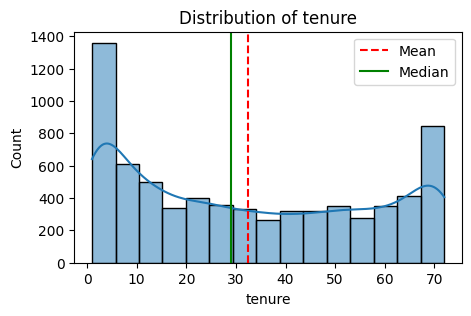

In [69]:
plot_histogram(df,'tenure')

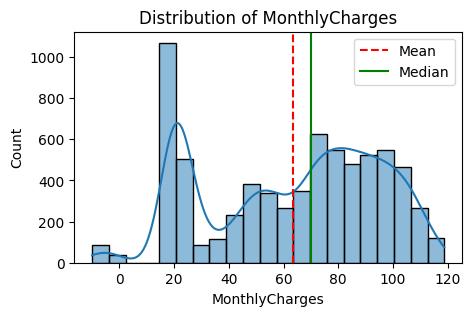

In [70]:
plot_histogram(df,'MonthlyCharges')

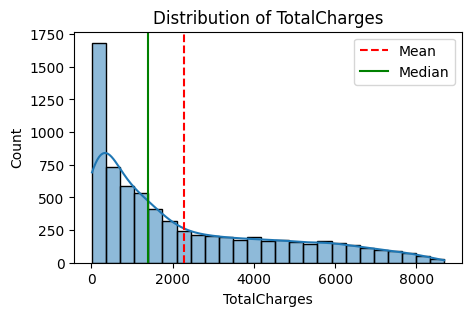

In [71]:
plot_histogram(df,'TotalCharges')

In [72]:
def box_plot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of{column_name}")
    plt.ylabel(column_name)
    plt.show()

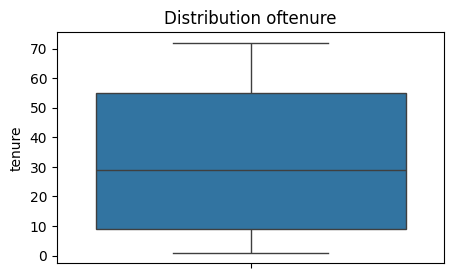

In [73]:
box_plot(df,'tenure')

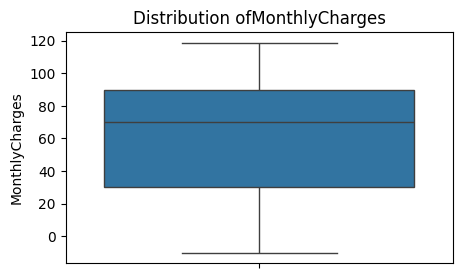

In [74]:
box_plot(df,'MonthlyCharges')

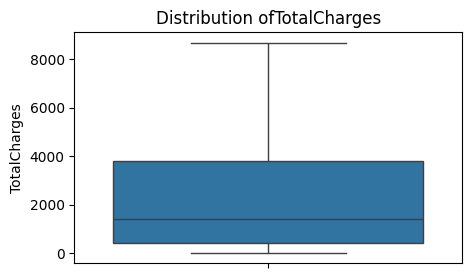

In [75]:
box_plot(df,'TotalCharges')

There are no outliers in the numerical features

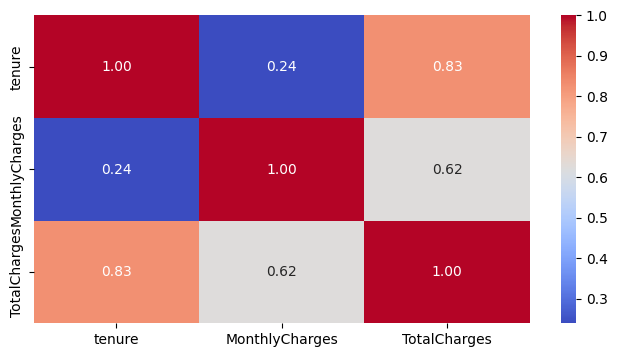

In [76]:
# Correaltion heatmap for numerical columns
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCtizen      7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [78]:
# Categorical Analysis
df['Dependents'].value_counts()

Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: count, dtype: int64

In [79]:
objec_cols = df.select_dtypes(include='object').columns.to_list()
objec_cols= ['SeniorCitizen'] + objec_cols
objec_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

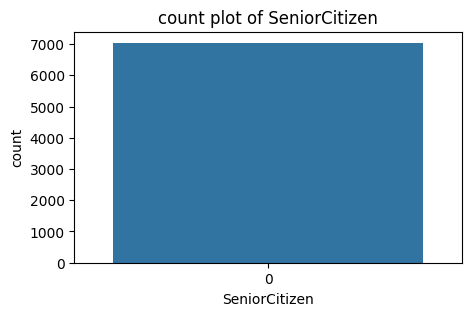

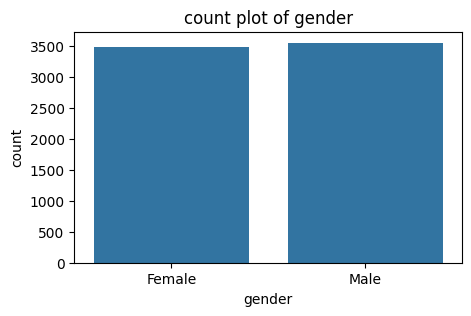

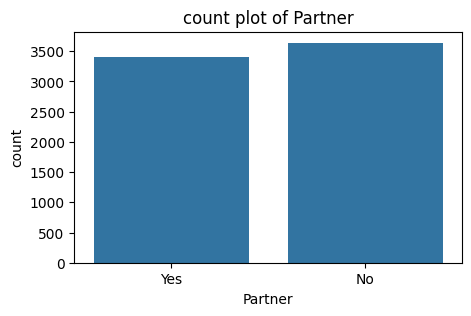

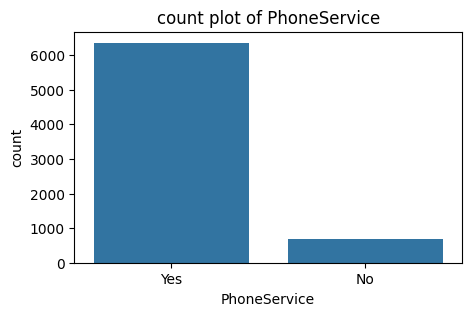

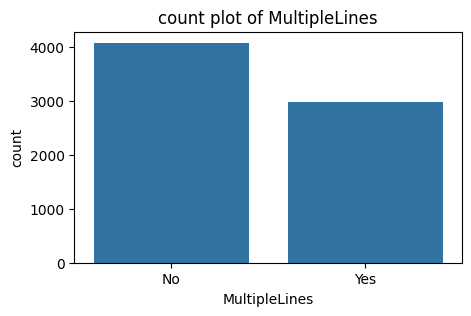

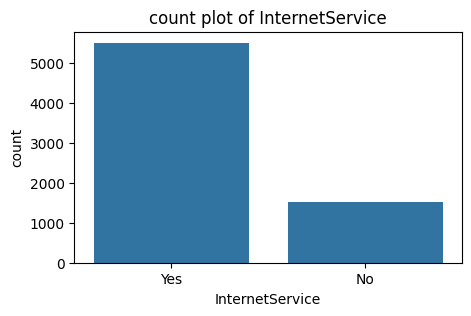

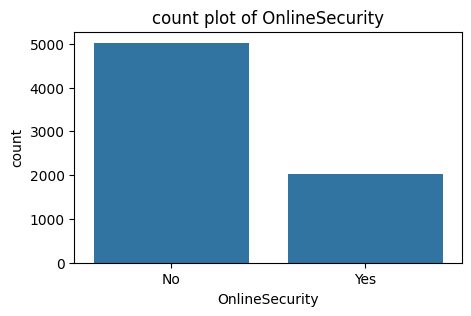

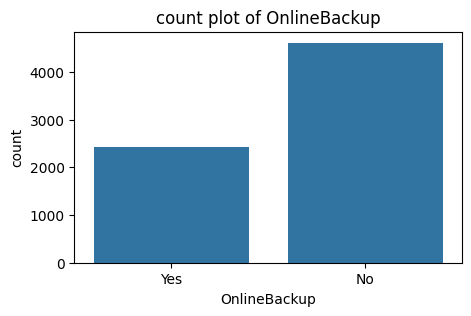

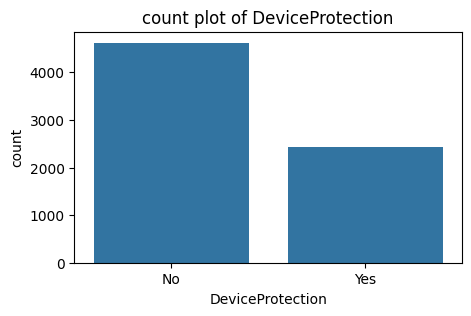

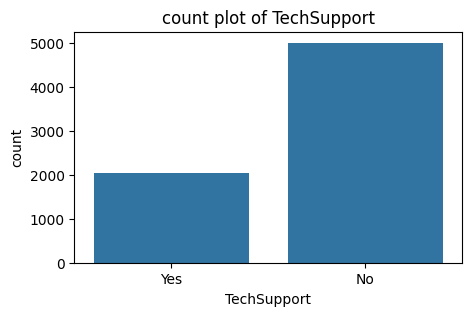

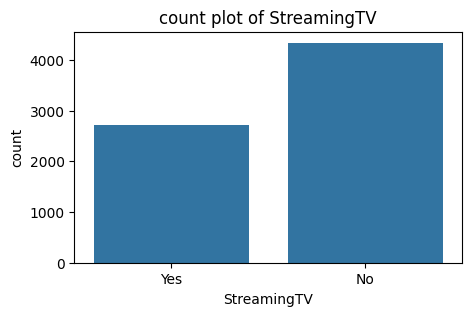

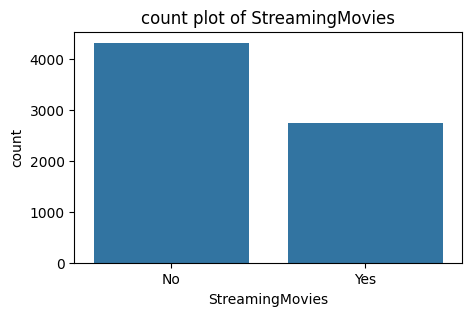

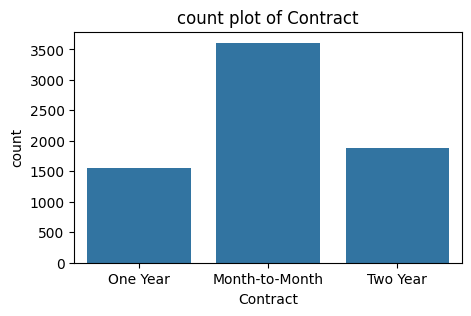

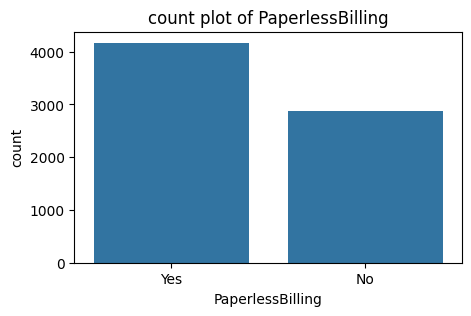

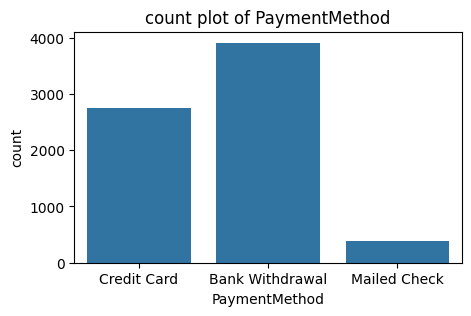

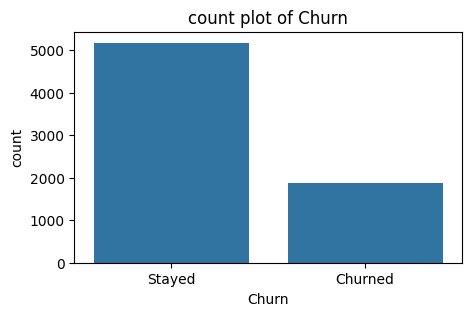

In [80]:
for col in objec_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()

In [81]:
# Data Preprocessing
df.head()

,gender,SeniorCtizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Age
0,Female,0,Yes,0,9,Yes,No,Yes,No,Yes,No,Yes,Yes,No,One Year,Yes,Credit Card,65.6,593.30,Stayed,0,0
1,Male,0,No,0,9,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,-4.0,542.40,Stayed,0,0
2,Male,0,No,0,4,Yes,No,Yes,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,Churned,0,0
3,Male,0,Yes,0,13,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,Churned,0,0
4,Female,0,Yes,0,3,Yes,No,Yes,No,No,No,Yes,Yes,No,Month-to-Month,Yes,Credit Card,83.9,267.40,Churned,0,0


In [82]:
df['Churn'].value_counts()

Churn
Stayed     5174
Churned    1869
Name: count, dtype: int64

In [83]:
df["Churn"]= df["Churn"].replace({"Churned":1 , "Stayed":0})

In [84]:
df.head()

,gender,SeniorCtizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Age
0,Female,0,Yes,0,9,Yes,No,Yes,No,Yes,No,Yes,Yes,No,One Year,Yes,Credit Card,65.6,593.30,0,0,0
1,Male,0,No,0,9,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,-4.0,542.40,0,0,0
2,Male,0,No,0,4,Yes,No,Yes,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,1,0,0
3,Male,0,Yes,0,13,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,1,0,0
4,Female,0,Yes,0,3,Yes,No,Yes,No,No,No,Yes,Yes,No,Month-to-Month,Yes,Credit Card,83.9,267.40,1,0,0


In [85]:
# label encoding other categorical fetaures
object_columns = df.select_dtypes(include="object").columns

In [86]:
object_columns

Index(['gender', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

In [87]:
# initializing a dictionary to save the encoders
encoders = {}
# apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]= label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder
    
# to save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders, f) 

In [88]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [89]:
df

,gender,SeniorCtizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Age
0,0,0,1,0,9,1,0,1,0,1,0,1,1,0,1,1,1,65.60,593.30,0,0,0
1,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,-4.00,542.40,0,0,0
2,1,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,0,73.90,280.85,1,0,0
3,1,0,1,0,13,1,0,1,0,1,1,0,1,1,0,1,0,98.00,1237.85,1,0,0
4,0,0,1,0,3,1,0,1,0,0,0,1,1,0,0,1,1,83.90,267.40,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,1,0,0,1,0,0,1,0,1,55.15,742.90,0,0,0
7039,1,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,0,85.10,1873.70,1,0,0
7040,1,0,0,0,2,1,0,1,0,1,0,0,0,0,0,1,1,50.30,92.75,0,0,0
7041,1,0,1,0,67,1,0,1,1,0,1,1,0,1,2,0,1,67.85,4627.65,0,0,0


In [112]:
# We need to deal with the class imblance using SMOTE
# Before that we gotta split the data into train and test
# Splitting the fetaures and target first
X = df.drop(columns=['Churn','Age'])
y = df['Churn']

In [113]:
X

,gender,SeniorCtizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen
0,0,0,1,0,9,1,0,1,0,1,0,1,1,0,1,1,1,65.60,593.30,0
1,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,-4.00,542.40,0
2,1,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,0,73.90,280.85,0
3,1,0,1,0,13,1,0,1,0,1,1,0,1,1,0,1,0,98.00,1237.85,0
4,0,0,1,0,3,1,0,1,0,0,0,1,1,0,0,1,1,83.90,267.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,1,0,0,1,0,0,1,0,1,55.15,742.90,0
7039,1,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,0,85.10,1873.70,0
7040,1,0,0,0,2,1,0,1,0,1,0,0,0,0,0,1,1,50.30,92.75,0
7041,1,0,1,0,67,1,0,1,1,0,1,1,0,1,2,0,1,67.85,4627.65,0


In [114]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: Churn, Length: 7043, dtype: int64

In [115]:
# split tarin and test data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [117]:
# Target class imbalance so SMOTE application ()
# Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=42)

In [118]:
X_train,y_train= smote.fit_resample(X_train,y_train)

In [119]:
y_train.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [120]:
# Model Training
# Training with default parameters
models = {"Decision Tree":DecisionTreeClassifier(random_state=42),"Random Forest":RandomForestClassifier(random_state=42),"XGB":XGBClassifier(random_state=42)}

In [121]:
# dictionary to store the cross vakidation scores
cv_scores={}

# perform 5 folds 
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.81
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.86
----------------------------------------------------------------------
Training XGB with default parameters
XGB cross-validation accuracy: 0.86
----------------------------------------------------------------------


Random Forest gives the better accuarcy among the rest

In [122]:
rfc = RandomForestClassifier(random_state=42)

In [123]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [124]:
# evaluation on test data
y_test_pred = rfc.predict(X_test)

print("Accuarcy Score\n",accuracy_score(y_test,y_test_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuarcy Score
 0.8019872249822569
confusion matrix
 [[873 163]
 [116 257]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409



In [125]:
# save the trained model as a pickle file 
model_data = {"model":rfc,"features_names":X.columns.tolist()}
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data,f)

In [126]:
# Load the saved model and build a predictive system
with open ("customer_churn_model.pkl",'rb') as f:
    model_data=pickle.load(f)
    
    loaded_model = model_data['model']
    features_names= model_data["features_names"]
    

In [127]:
loaded_model

RandomForestClassifier(random_state=42)

In [128]:
features_names

['gender',
 'SeniorCtizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen']

In [143]:
df= df.drop(columns=['Age','SeniorCitizen'])

In [145]:
df=df.rename(columns={'SeniorCtizen':'SeniorCitizen'})

In [146]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,9,1,0,1,0,1,0,1,1,0,1,1,1,65.60,593.30,0
1,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,-4.00,542.40,0
2,1,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,0,73.90,280.85,1
3,1,0,1,0,13,1,0,1,0,1,1,0,1,1,0,1,0,98.00,1237.85,1
4,0,0,1,0,3,1,0,1,0,0,0,1,1,0,0,1,1,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,1,0,0,1,0,0,1,0,1,55.15,742.90,0
7039,1,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,0,85.10,1873.70,1
7040,1,0,0,0,2,1,0,1,0,1,0,0,0,0,0,1,1,50.30,92.75,0
7041,1,0,1,0,67,1,0,1,1,0,1,1,0,1,2,0,1,67.85,4627.65,0


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No',
    'InternetService': 'Yes',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

NameError: name 'known_categories' is not defined